## <center>Self practice</center>

* Using steel industry energy consumption dataset from ([Link](https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption)) or `ml-regression.db`.
    1. Split the data to train and test set (80% training). Use [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    1. Train a multiple linear regression model that will predict the energy consumption `(Usage_kWh)`.
    1. Print the model `Mean Absolute Error`, `Mean Squared Error` and `Root Mean Squared Error`


* Select one indipendent and select `Usage_kWh` as dependent variable
    1. Visualise the data (using `matplotlib`)
    1. Create a Polynomial Regression model using `[1,5,24]` as degrees
    1. Explain your observations in terms of Over-fitting, Under-fitting, Bias-Variance trade-offs.

In [ ]:
# !pip install ydata_profiling
# !pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from ydata_profiling import ProfileReport
from sqlalchemy import create_engine, text
from category_encoders import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
%matplotlib inline

In [ ]:
steel_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Lab 2/Steel_industry_data.csv', low_memory=False)

In [ ]:
report = ProfileReport(steel_df)
# report.to_file('data_profile_report.html')

In [ ]:
steel_df.sort_values(by='date')
steel_df.drop(columns=['date'], inplace=True)

In [ ]:
# Split the data to train and test set (80% training)
y = steel_df[['Usage_kWh']]
X = steel_df.drop(columns=['Usage_kWh'], inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [ ]:
# One-hot encode
categorical_columns = X_train.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(cols=categorical_columns)

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [ ]:
# Train a multiple linear regression model that will predict the energy consumption (Usage_kWh)
regressor = LinearRegression()
regressor.fit(X_train_encoded, y_train)

LinearRegression()

In [ ]:
# Predict
y_pred = regressor.predict(X_test_encoded)

In [ ]:
# Train
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, regressor.predict(X_train_encoded)))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, regressor.predict(X_train_encoded)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train_encoded))))

Mean Absolute Error: 2.644481304593882
Mean Squared Error: 24.289883620258863
Root Mean Squared Error: 4.928476805287701


In [ ]:
# Test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.350567663374721
Mean Squared Error: 12.369779308375948
Root Mean Squared Error: 3.517069704793459


In [ ]:
# Select one independent and select Usage_kWh as dependent variable
X_train = X_train[['Lagging_Current_Reactive.Power_kVarh']]
X_test = X_test[['Lagging_Current_Reactive.Power_kVarh']]

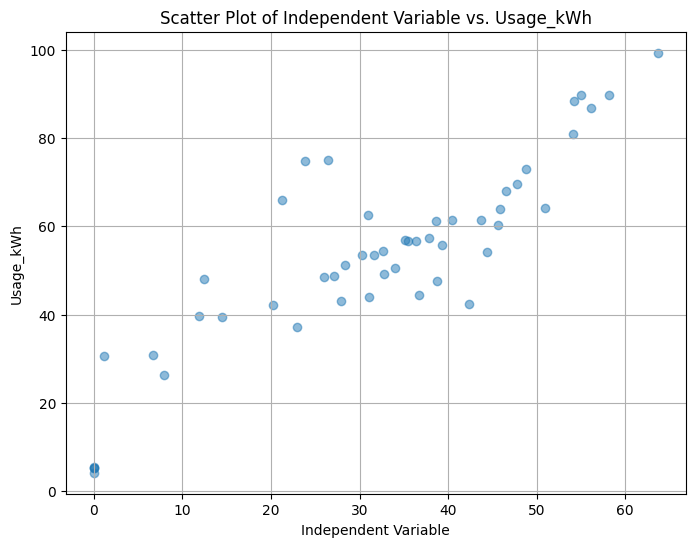

In [ ]:
# Visualise the data (using matplotlib)
plt.figure(figsize=(8, 6))
plt.scatter(X_train.tail(50), y_train.tail(50), alpha=0.5)
plt.title('Scatter Plot of Independent Variable vs. Usage_kWh')
plt.xlabel('Independent Variable')
plt.ylabel('Usage_kWh')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
degrees = [1, 5, 24]

for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),

                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    y_pred_test = pipeline.predict(X_test)
    y_predict_train = pipeline.predict(X_train)


    print(f"For degree = {degrees[i]}")

    # Train
    print("Train")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_predict_train))
    print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_predict_train))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_predict_train)))
    print()

    # Test
    print("Test")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    print("-"*40)

For degree = 1
Train
Mean Absolute Error: 11.255639920239311
Mean Squared Error: 243.50741415251392
Root Mean Squared Error: 15.604724097289061

Test
Mean Absolute Error: 8.295653686591528
Mean Squared Error: 127.4673258934851
Root Mean Squared Error: 11.290142864175152
----------------------------------------
For degree = 5
Train
Mean Absolute Error: 10.129298207577122
Mean Squared Error: 215.2152811884397
Root Mean Squared Error: 14.670217489473007

Test
Mean Absolute Error: 7.241358090453672
Mean Squared Error: 112.21763850402607
Root Mean Squared Error: 10.593282706697961
----------------------------------------
For degree = 24
Train
Mean Absolute Error: 26.203157767143114
Mean Squared Error: 927.4004088435858
Root Mean Squared Error: 30.453249561312596

Test
Mean Absolute Error: 25.166941163661665
Mean Squared Error: 790.7043668152444
Root Mean Squared Error: 28.1194659767081
----------------------------------------
